### HW1 Solution Part 2

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# Read in the data

data = pd.read_csv('infection_data.csv')
print(data)

        Test1     Test2  Infection
0    0.295578  1.289804          0
1    0.024831 -0.788522          1
2    0.131159  1.190200          0
3   -0.542544 -0.020009          1
4    0.694037  0.534599          1
..        ...       ...        ...
995 -0.405666  0.509306          1
996 -0.387878 -1.287859          0
997  0.620373  0.727452          1
998  0.005006 -0.136091          1
999  0.561811  1.677422          0

[1000 rows x 3 columns]


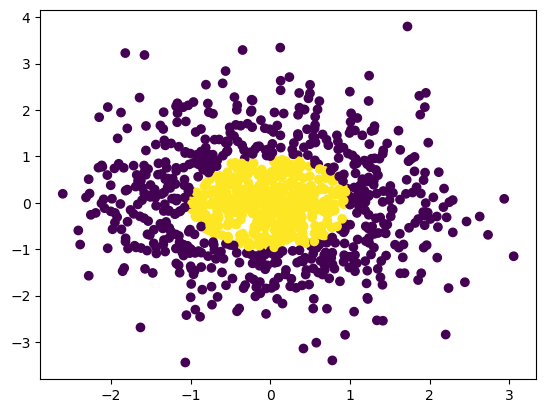

In [3]:
# Visualize the data

plt.scatter(data['Test1'],data['Test2'],c=data['Infection'])
plt.show()

##### I did some additional analysis in the cell below to get more insight. This is just an example of all the different things you can look at in a dataset to get maximum overall insight

In [4]:
# Check dataset for imbalance of classes
print(f"Check if dataset is balanced: {data.Infection.value_counts()}")

# Separate X and y and split the data

X = data.drop('Infection',axis=1)
y = data['Infection']

print(f"Shapes X and y: {X.shape,y.shape}")

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

Check if dataset is balanced: Infection
0    597
1    403
Name: count, dtype: int64
Shapes X and y: ((1000, 2), (1000,))


__Clearly the dataset is imbalanced to start with - 50% more '0' class compared to '1'.__

That means, if I can predict all 0's correctly, my accuracy will be the highest for the given dataset and the given algorithm.

In [5]:
# Build the model

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)

print(f"Train predictions:\n{train_pred[:150]}\n\nTest predictions:\n{test_pred}")

Train predictions:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

Test predictions:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [6]:
# Print the metrics to assess the model

print(f"Accuracy train: {accuracy_score(y_train,train_pred)*100,'%'}")
print(f"Accuracy test: {accuracy_score(y_test,test_pred)*100,'%'}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,test_pred)}")

Accuracy train: (59.411764705882355, '%')
Accuracy test: (61.33333333333333, '%')
Confusion Matrix:
[[92  0]
 [58  0]]


In [7]:
# Plotting the decision boundary

intercept = logreg.intercept_
slopes = logreg.coef_[0]

print(f"Intercept: {intercept}\nSlopes:\n{slopes}\n")


# Compute coordinates for plotting decision boundary 
# theta0 + theta1*Test1 + theta2*Test2 = 0 (where theta0 is interceot and theta1 and theta2 are the slope values)

# Solving the above equation by taking Test1 = 0 and in the second case Test2 = 0 we get 2 cooridnates

# When Test1 = 0
# Test2 = -intercept / slopes[1]
Test2 = -intercept / (slopes[1]*np.max(X['Test1']))

# When Test2 = 0
# Test1 = -intercept / slopes[0]
Test1 = -intercept / (slopes[0]*np.max(X['Test1']))


# Create the X and the y cooridnates for plotting
Test_X = (np.max(X['Test1']),Test2[0])
Test_y = (Test1[0],np.max(X['Test1']))

print(f"Coordinates:\n Test_X: {Test_X} and Test_y: {Test_y}")

Intercept: [-0.38084378]
Slopes:
[ 0.01148831 -0.01911077]

Coordinates:
 Test_X: (3.0570231930362426, -6.5188338127888885) and Test_y: (10.844062572533321, 3.0570231930362426)


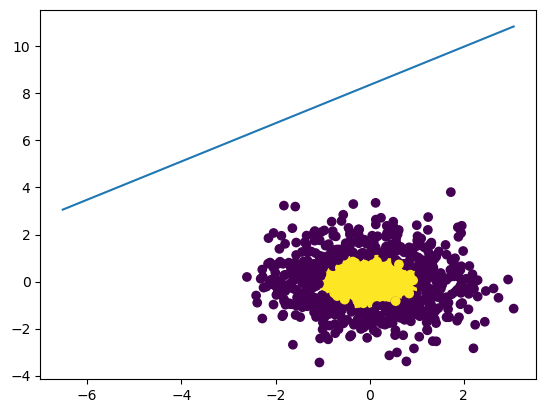

In [8]:
# Plot Decision boundary

plt.scatter(data['Test1'],data['Test2'],c=data['Infection'])
plt.plot(Test_X,Test_y)
plt.show()

1. Clearly the linear decision boundary of Logistic Regression is not suitable for this non-linear decision boundary. The decision boundary should be a circle / ellipse.

2. Plotting the decision boundary explains why the confusion matrix predicted everything as Poisitve class.

